<a href="https://colab.research.google.com/github/Carhuacusma/CC62_Data_Mining_TB_20202/blob/master/CC61_PDI_Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CC61: Procesamiento de Imágenes
#**Trabajo Final**

Alumnos:
* Galván Díaz, Joaquín Adrían : u201810A.
* Moreno Carhuacusma, Dante Brandon : u201818067

## Objetivos

## Desarrollo

###Importación de librerías

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow

In [ ]:
#No da error en colab pero no funciona el import {simbolo de exclamcion} pip install scikits.audiolab

In [ ]:
#from scikits.audiolab import play

In [2]:
repo = "https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_Trabajo_Final/main/Data/"

In [3]:
ruta = "Fotos/mary_hoja.jpg"
imHoja = io.imread("%s%s"%(repo,ruta))
print(type(imHoja))

<class 'numpy.ndarray'>


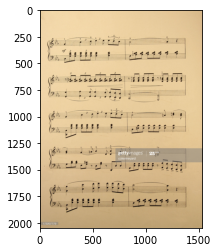

In [4]:
imagen = io.imread("https://media.gettyimages.com/photos/antique-sheet-music-picture-id172207779?s=2048x2048") #..Considerar: io.imread lee en RGB
#.........................................................cv2 imshow es en BGR
plt.imshow(imagen)

In [10]:
def rectificar(imagen, umbralHoja = 0.5):
  if len(imagen.shape) != 2:
    imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) #....................| 1. Asegura Escala de Grises, 
  imagen = cv2.bilateralFilter(imagen,d=3,sigmaColor=75,sigmaSpace=30) # .| 2. Blur, 
  im_canny = cv2.Canny(imagen,50,205) #...................................| 3. Edge Detector: Canny >> Imagen con bordes
  contornos, _ = cv2.findContours(im_canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #...| 1. Extrae "Contornos" con Cadena (findContours) 
  contornos = sorted(contornos, key = cv2.contourArea, reverse = True) #..............| 2. Ordenar "Contornos" por Área |
  contornos = contornos[:int(0.15*len(contornos))] #..................................| 3. Solo el 15 % con más área
  candHoja = []
  auxArea = 0
  for c in contornos: #..................................... Por cada C que pertenece a Contornos:
    perimetro = cv2.arcLength(c, True) #........................ Perímetro 
    approx = cv2.approxPolyDP(c, 0.015 * perimetro, True) #..... Disminuir el número de lados de C
    if len(approx) == 4: #...................................... Si el approx es de 4 lados:
      auxArea = cv2.contourArea(approx) #................................ Área del candidato a hoja
      if auxArea/((imagen.shape[0])*(imagen.shape[1])) > umbralHoja: #... Si la proporción candidato/imagen supera el umbral:
        candHoja = approx #................................................... Candidato es hoja
        break
  if len(candHoja) > 0:
    auxIm = imagen.copy()
    cv2.drawContours(auxIm, [candHoja], -1, (0, 255, 0), 3)
    cv2_imshow(auxIm)
    return candHoja, auxArea
  return imagen

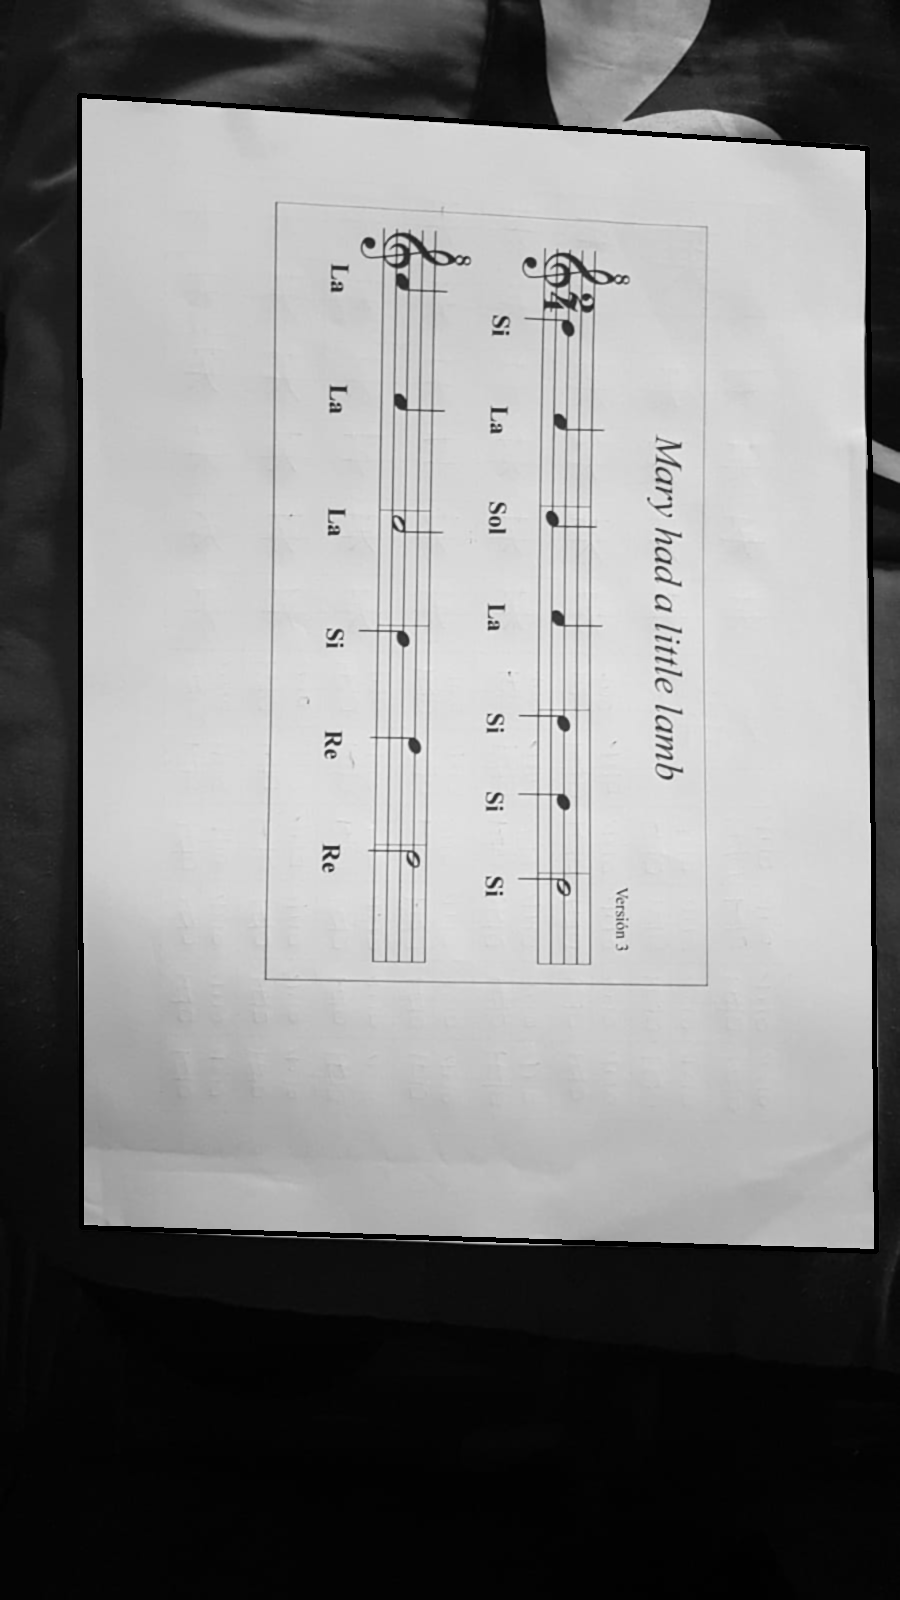

(array([[[  79,   95]],
 
        [[ 867,  148]],
 
        [[ 876, 1251]],
 
        [[  81, 1227]]], dtype=int32), 884289.5)

In [11]:
rectificar(imHoja,0.5)

In [12]:
rectificar(imagen,0.5)

array([[215, 215, 215, ..., 184, 184, 183],
       [214, 214, 214, ..., 184, 183, 184],
       [212, 212, 212, ..., 185, 185, 185],
       ...,
       [160, 160, 161, ..., 164, 163, 162],
       [161, 161, 162, ..., 165, 164, 163],
       [161, 162, 163, ..., 165, 165, 164]], dtype=uint8)

In [ ]:
#https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed 
#https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
#sigmaSpace alto podría terminar borrando detalles y no queremos eso porque líneas
#d=3 porque tampoco queremos un blur tan fuerte
imagen = cv2.bilateralFilter(imagen,d=3,sigmaColor=75,sigmaSpace=30)